# PNI Biomath 2017 -- Programming module -- Day 3


### Items to be covered

0. For writing and debugging code, the importance of thinking like a computer
0. **Thinking sequentially, like a computer:** Stepping carefully through how a function works
1. Modules
2. **Thinking sequentially, like a computer:** Recap of FOR loops and debugging using question 6 from the Day 2 Exercises 
3. Documentation and Updating
4. Packages
5. Plotting
6. Numpy
7. Scipy






# Computers are very stupid: they only do what you tell them to do, in the order you tell them to do it!

When you use your smartphone or your laptop, computers can seem almost magical: at the touch of a button you are using them to watch a video, search the internet, or recognize and carry out a request that you voiced. Yet the elementary functions that they can do, down at the hardware transistor level, are incredibly simple: digital computers work exclusively with 0s and 1s (bits),  they know how to do AND, OR, NOT, and can put or retrieve a single bit in memory. That's about it. Really.

Seems kind of amazing. _How do you go from something so elementary all the way to understanding spoken speech or running a word processor?_

In a sense, the answer is **using functions as building blocks that build on each other**. Think of the elementary operations a computer can do as building blocks. You can put some of these building blocks together, to do something new and useful, and that is now a new building block, that you can in turn build on.  For example, using the Boolean logic functions (AND, OR, NOT) you can put together a sequence that implements the addition of two multi-digit binary numbers held in memory.  Let's call that our new function SUM(). If you implemented, debugged, and encapsulated that function well, that is now a new building block that you and others can use: you now treat SUM() just like you would treat a native operation like AND() or OR(). [In particular, by encapsulation we mean that you when you use it, you can do so without worrying at all about how it was implemented internally: you're confident that it works (it's been fully debugged), running SUM() isn't going to interfere with any other code you are writing, and the only brain space you need to devote to SUM() is to know that if you give it two numbers, it produces their sum.]

Using SUM(), you could now write a new function to define MULTIPLICATION(). Tadaa! Now you can multiply!  You could then use MULTIPLICATION() to write an POWER() function, to raise one number to some power. And so on and so on, all the way to word processors and Python and all the rest. Even though at the bottom it is still all AND, OR, NOT, and single binary digits.  The exercises following Lecture 2 contained a series of problems that were all about this: building a single die, from there rolling it many times, from there computing some statistics about large numbers of rolls, etc.

## Thinking sequentially, like a stupid computer, is at the heart of writing and debugging code

One common mistake that we make is that, because we're so used to computers doing seemingly-magical things (and by the level of Python, some of its commands are pretty magical), when we're trying to write or debug some code, we guess an answer as to what the code should look like, and hope the computer will understand what we mean and what we want it to do. But when we do that, we forget the cardinal rule for thinking like a computer: *Computers are stupid. They only know about doing what you told them to do, in the order you told them to do it.*  They don't think ahead, nor can they guess what you meant and implement that.

> I know. Some of you will point out at this point that, contrary to what we've written here, when you mistype a search into Google, it *does* think ahead and guess what you meant, and suggests and implements that! But that is the result of many many levels of building blocks as we described before. When working with Python or any other scientific programming language, you're well below your computer guessing what you mean.

So, to write code, and specially to debug it, you have to stop and think like a computer. (Which is a super-weird thing to do if you're not used to it, humans don't work like that.) 

Whhen you're **writing** code, think *what is the sequence of steps that I would have to spell out for my brainless computer so that at the end of that sequence, it reaches the rsult I wanted*? In other words, how do you take the building blocks you already have and arrange them into a sequence, i.e. a new building block that achieves what you want?  If you have a large problem, how do you split it into simpler building blocks? And then for each of those simpler building blocks, how would you split that, until you reach building blocks already available to you? 

When you're **debugging** code, mentally step through each line of your code, simulating what you've asked the computer to do. At each step of the code, think *what are the values of the variables that I'm working with when the computer reaches this line of code?* And *if the computer knows nothign else and doesn't know what I'm trying to do, what will be the result of executing the line of code*?  And then iterate, thinking that as you step through each line.

===

### So, some items for today

In the spirit of the comments above, among other things today we'll carefully go over two examples: 

1. What are the sequence of steps that calling a function implements? This will also allow us to review the very important concept of namespaces.  
2. How to we debug a problem with a FOR loop?


Have fun!


In [ ]:
def f(x):
    return x*x

In [ ]:
y = 2

a = f(3*exp(y))

when you call  a =  f(3*exp(y))  this means the sequence

1. figure out what part of memory the label "y" refers to
2. Go to that memory bank and retrieve the value stored there.
3. Compute the exponential of that value
4. Multiply it by 3  (and we still haven't reached the f() bit. The point so far is to emphasize that expression evaluation happens before calling the function).
5. Assign that result to a new variable that, for short, we'll call x (but we could think of it as internally really being named something like f_x, to label it as being part of f's namespace)
6. Now enter function f.
7. Compute x*x
8. Return that value, and assign it to an anonymous variable that we'll call "the current expression."
9. Now that you've come out of f(), delete f_x.
10. Finally, evaluate the "a = " part, which means store the final result in the part of memory that the label "a" points to.

But wait!  In step 5, we wrote "assign that result to a new variable..."  What does _that_ mean?  Well, like everything else in coding (until you get to AND, OR, NOT, and XOR), it is shorthand for a set of simpler steps, namely

5.1 Find an empty slot in the memory bank
5.2 Make a label called f_x and have it point to that memory slot
5.3 Put the value you were going to store in that memory slot.

---
# Modules
modular programming

## modules

Modules let you collect all of your functions in a centralized location, so that you can apply the "rule of two" across multiple files.

*Make sure the module you're trying to import (i.e. `myModule.py`) is in the same folder as your notebook!*

You can import specific functions or variables into your namespace:

In [89]:
from myModule import f, pi

print(f(3))
print(pi)
print(james)

18
3.141569


NameError: name 'james' is not defined

You can also choose to import *everything* in a module:

In [11]:
%load_ext autoreload
%autoreload

from myModule import *

Or you can import the whole module and the functions and variables are available as sub-parts

In [91]:
def f():
    print("Still here!\n")
    
    
import myModule

print(myModule.f(3))
print(myModule.pi)

f()

18
3.141569
Still here!



In [ ]:
import myModule as mod

print(mod.f(3))
print(mod.pi)
mod.pi



In [93]:
import numpy as np   # import the numerical package
import matplotlib.pyplot as plt   # this a particular plotting module from the matplotlib package

# help(np)

z = np.array([1, 2, 40, 50, 61])

[0 if x%2==0 else x for x in z]


[1, 0, 0, 0, 61]

## documentation

You can use

    help()
    
or 
    ?
    
or, in Jupyter, *Shift* + *Tab* to get information about the module and its functions through the "doc string"s that you wrote. (Of course you wrote them! Long, clear, and detailed, right?)

In [ ]:
mod.f?    # like pressing Shift + Tab*3
help(mod.f)
help(mod)

In the Jupyter notebook, when the cursor is inside the function parentheses, press `Tab` to get a reminder of parameter names.

In [ ]:
mod.f(10, a=4)

## Example Problem: Loading, and Recap of FOR loops and debugging

Using an example from your exercise set on Tuesday, we will go through question six.

Within Python, you can load easily MATLAB data using the SciPy function loadmat(). This will create a variable called mystring that contains some text. We also define a new string called vowels.

Using a loop through the elements of your vowels string, compute how many times each vowel appears in the text of mystring (i.e., how many ‘a’, how many ‘e’, how many ‘i’, etc.).

In [8]:
### Here we load the string from the .mat file for you (try printing mystring to see what it says!)
from scipy.io import loadmat
mystring = loadmat('joyce.mat')['str'][0]
vowels = 'aeiou'

In [9]:

mystring

"The air of the room chilled his shoulders. He stretched\nhimself cautiously along under the sheets and lay down\nbeside his wife. One by one, they were all becoming\nshades. Better pass boldly into that other world, in\nthe full glory of some passion, than fade and wither\ndismally with age. He thought of how she who lay beside\nhim had locked in her heart for so many years that image\nof her lover's eyes when he had told her that he did\nnot wish to live.\n\nGenerous tears filled Gabriel's eyes. He had never felt\nlike that himself towards any woman, but he knew that such\na feeling must be love. The tears gathered more thickly in\nhis eyes and in the partial darkness he imagined he saw the\nform of a young man standing under a dripping tree. Other\nforms were near. His soul had approached that region where\ndwell the vast hosts of the dead. He was conscious of, but\ncould not apprehend, their wayward and flickering existence.\nHis own identity was fading out into a grey impalpable w

In [ ]:
### Count how many times each vowel appears in mystring below
for v in vowels:
    
    for c in mystring:
        count = 0
        if c == v:
            count += 1
    print(v, count)

---
# Packages
big projects, sharing code

## packages

* collections of modules
* cross-language integration
* distribution

## distribution

From simplest to most complicated:
1. Anaconda: `conda install [package]`
2. PIP / PyPI: `pip install [package]`
3. GitHub / Git: `git clone [package]`

---
# Plotting

## matplotlib

Plotting in Python is done through the `pyplot` module in the `matplotlib` package. More on models and packages later. For know, just know that, to use this functionality, you'll need to run the following commands in any notebook that uses this for plotting. 

In [4]:
# this line is ALWAYS needed for plotting
from matplotlib import pyplot as plt


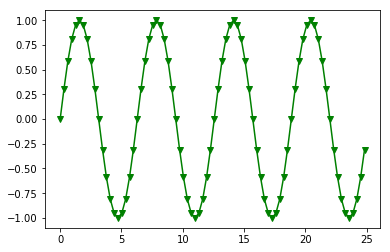

In [5]:
# The following line makes plots show up within the notebook
%matplotlib inline

# Now lets import the plotting module from the package matplotlib
from matplotlib import pyplot as plt

# And lets import the numerical package
import numpy as np

ncycles = 4
# produce a vector whose elements start at 0, go to 2*np.pi*ncycles in steps of pi/10
t = np.arange(0, 2*np.pi*ncycles, np.pi/10)
# print(t)

plt.plot(t, np.sin(t), 'gv-')
# plt.plot  takes a vector of x positions and a same-length vector of y positions,
# and plots dots in order: x[0],y[0]  then x[1],y[1]   then x[2],y[2]

In [103]:
t = np.array([0, 0.3, 0.6])
print(np.sin(t))

[ 0.          0.29552021  0.56464247]


In [ ]:
# The following alternative line uses the dafault "plotting back end" on your computer
# You might need to restart the kernel and clear outputs if you want to switch to this external plotting form
%matplotlib

# Now lets import the plotting module from the package matplotlib
from matplotlib import pyplot as plt

# And lets import the numerical package
import numpy as np

ncycles = 4
t = np.arange(0, 2*np.pi*ncycles, np.pi/10)
plt.plot(t, np.sin(t), 'ro-')


## Plotting single points

First let's plot a single point

`plt.plot(x, y, format_str)`
- `x`: x coordinate
- `y`: y coordinate
- `format_str`: formatting string

In [ ]:
plt.plot(2, 3, 'o')

We can change the shape of the marker with the format string
*Note:* The semicolon at the end of the plotting command surpresses the output of the name of the plotting object (e.g. *[< matplotlib.lines.Line2D at 0x10fe4da58>]*, as seen above), but not the plot itself

In [ ]:
plt.plot(2, 3, '^');

We can also specify a color in the format string

In [ ]:
plt.plot(2, 3, 'or');

We can plot multiple points by plotting multiple times

In [ ]:
plt.plot(1, 2, 'ro');
plt.plot(2, 3, 'ro');
plt.plot(3, 4, 'ro');

As you can see, PyPlot doesn't always pick the best defualt values for the ranges of the x- and y-axes. We can set them by hand.

In [ ]:
plt.plot(1, 2, 'ro');
plt.plot(2, 3, 'ro');
plt.plot(3, 4, 'ro');

plt.xlim([0, 5]);
plt.ylim([0, 5]);

## Plotting lines

To plot a line, make `x` and `y` into a `list` of coordinate values

In [ ]:
plt.plot([0, 1, 2], [0, 1, 4], 'r')

If we include marker shape in the format string, we can make our previous plot this way

In [ ]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

We can also do both points and lines

In [ ]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro-');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

### plotting separate vertical lines

The length of h is  2


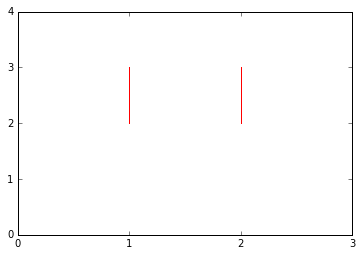

In [119]:
h = plt.plot([[1,2], [1,2]], [[2,2], [3,3]], 'r-')
# plot returns not axes (like imshow did) but a list of lines 

ax = h[0].axes
ax.set_xticks(range(0, 4))
ax.set_yticks(range(0, 5))

print("The length of h is ", len(h))

## Additional formatting

It's always important to label your axes!

In [ ]:
plt.plot([1, 2, 3], [2, 3, 4], 'ro-');
plt.xlim([0, 5]);
plt.ylim([0, 5]);

plt.xlabel('input');
plt.ylabel('output');

Nearly every aspect of these plots is editable -- titles, fonts, colors, tick marks, etc, etc. Google is your best friend for figuring out how to change these features.

## Multiple Plots

Let's make two different sets of data to play with.

In [113]:
x = range(6)

# y = 4*x
y1 = []
for val in x:
    y1 += [4*val]
    
# y = x**2
y2 = []
for val in x:
    y2 += [val**2]
    
print("x:", list(x))
print("y1:", y1)
print("y2:", y2)

x: [0, 1, 2, 3, 4, 5]
y1: [0, 4, 8, 12, 16, 20]
y2: [0, 1, 4, 9, 16, 25]


One way of comparing these two trends is to plot them on top of each other

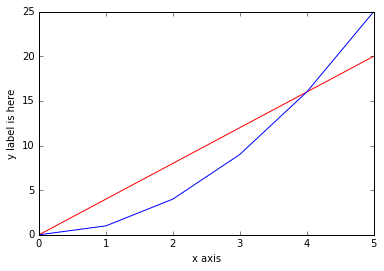

In [116]:
plt.plot(x, y1, 'r');
plt.plot(x, y2, 'b');
plt.xlabel('x axis')
plt.ylabel('y label is here')

Another approach is to use two subplots

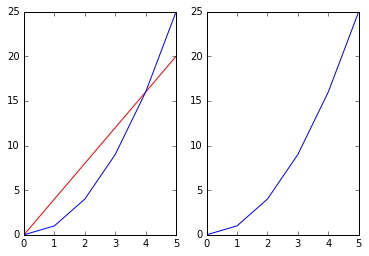

In [118]:
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot
plt.plot(x, y1, 'r');
plt.plot(x, y2, 'b');
plt.ylim([0, 25]);

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot
plt.plot(x, y2, 'b');
plt.ylim([0, 25]);

## Advanced Examples -- aka Eye Candy

Don't pay too much attention to the actual implementation quite yet, this is just to show you some examples of different types of plots!

Histograms

In [120]:
from pylab import *

In [2]:
import numpy as np
import numpy.random
x = numpy.random.normal(size=10000)
plt.hist(x, bins=np.linspace(-4,4,31));
plt.xlabel('x');
plt.ylabel('Counts');

NameError: name 'plt' is not defined

contour plots

(-1, 1)

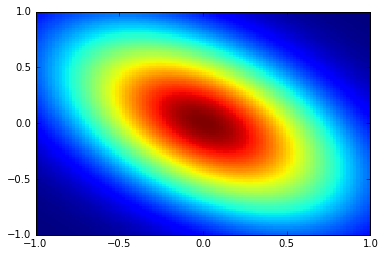

In [122]:
dx = 0.02
dy = 0.02
x = arange(-1,1+dx,dx)
y = arange(-1,1+dy,dy)
X, Y = meshgrid(x,y)

Z = exp((-X**2-Y**2-X*Y)/0.5)
Z = Z[:-1,:-1]
pcolor(X,Y,Z)
xlim(-1,1)
ylim(-1,1)

A heart in 3D

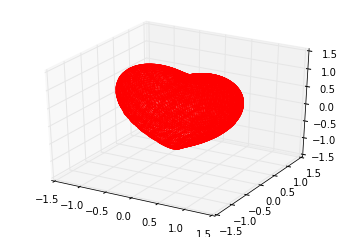

In [123]:
from mpl_toolkits.mplot3d import Axes3D

def heart_3d(x,y,z):
    return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3
def plot_implicit(fn, bbox=(-1.5,1.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = figure()
    ax = fig.add_subplot(111, projection='3d')
    A = linspace(xmin, xmax, 100) # resolution of the contour
    B = linspace(xmin, xmax, 100) # number of slices
    A1,A2 = meshgrid(A,A) # grid on which the contour is plotted
    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z',colors=('r',))
        # [z] defines the only level to plot for this contour for this value of z
    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y',colors=('red',))
    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('red',))
    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    show()

plot_implicit(heart_3d)
# credit: http://bytesizebio.net/2013/02/16/a-belated-valentines-day-post/

## NumPy

NumPy is probably the package you will use the most, as it is "the fundamental package for scientific computing with Python"

A NumPy `ndarray` is a multi-dimensional array -- i.e. like a list, but with multiple indices and every element being of the same type. For example, a two-dimensional array is like a "list of lists" where each sub-list is required to be the same length.

In [124]:
import numpy as np

l = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
print(l)
print(type(l))

print()

a = np.array(l)
print(a)
print(type(a))

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
<class 'list'>

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
<class 'numpy.ndarray'>


Arrays have nice element-wise behavior under basic arithmetic operations. This allows us to avoid needing to write loops.

In [ ]:
a = [0, 1, 2]
print(a)

for i in range(3):
    a[i] *= 2

print(a)

In [126]:
a = np.arange(3)
print(a)
print(2*a + 3)

[0 1 2]
[3 5 7]


In [ ]:
print(a + a)
print(a - a)
print(a * a)

Most of all, we get linear algebra (matrix multiplication, etc)

In [127]:
l = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
a = np.array(l)
print("a = \n", a)
print("\n")      

b = np.array([[1], [2], [3]])
c = b.transpose()
print("b = \n", b)
print("c = ", c)


print("\na.dot(b) = \n", a.dot(b))

print("\nanother way to do matrix multiplication: a @ b = \n", a @ b)

a = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


b = 
 [[1]
 [2]
 [3]]
c =  [[1 2 3]]

a.dot(b) = 
 [[14]
 [32]
 [50]
 [68]]

another way to do matrix multiplication: a @ b = 
 [[14]
 [32]
 [50]
 [68]]


There are multiple ways to create useful arrays

In [ ]:
a = np.arange(2, 10, 2) # like range(), but with more complex options and retruns a numpy array instead of a list
print(a)

# for example, we can do non-integer steps

In [ ]:
print(a.shape)

Initialize a matrix of a particular size to all zeros

In [ ]:
a = np.zeros((4, 1))
print(a)

# Indexing and slicing

In [134]:
a = np.arange(0, 20)
# print(a)
a  = a.reshape([4,5])

print("Initial version of a = \n", a)

# remember first element is 0!
a[2,3]   # the 2-index row (3rd row because first position is index 0) and 3-index column


a[2,3] = 1000

print("\nNow a is\n",  a)

Initial version of a = 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

Now a is
 [[   0    1    2    3    4]
 [   5    6    7    8    9]
 [  10   11   12 1000   14]
 [  15   16   17   18   19]]


In [148]:
a = np.array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])
print(a)

print(a[0:-1:3])

# a[0:-1:2,:]    # colon syntax is starting_index, ending_index, step [optional]

# start at third index and go all the way to end:
print(a[3:])

b = np.arange(0, 20)
b  = b.reshape([4,5])
print("\b b is \n", b)

# every other row, all columns:
print("\nevery other row, all columns:\n", b[0:-1:2, :])

[1000 2000 3000 4000 5000 6000 7000 8000]
[1000 4000 7000]
[4000 5000 6000 7000 8000]
 b is 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

every other row, all columns:
 [[ 0  1  2  3  4]
 [10 11 12 13 14]]


**PITFALL:** Numpy has 1 dimensional arrays, distinct from single rows or columns which are 2D arrays
+ 1D array has shape `(N,)`
+ A 2D row has shape `(1,N)`
+ A 2D column has shape `(N,1)`

The 1D arrays allow more flexibility in many instances, but some functions require a 2D array as input, or behave differently when given a 1D array instead of a 2D array. Not recognizing these instances and getting errors or incorrect results is one of the primary mistakes of new Numpy users. 

For turning a 2D array into a 1D array, the functions `np.squeeze()` and `np.flatten()` are useful

For turning a 1D array into a 2D array, the `np.reshape()` function is useful

In [ ]:
a = np.zeros((4, 1))
print(a, a.shape, "\n")

a = a.squeeze()
print(a, a.shape, "\n")

a = a.reshape([4,1])
print(a, a.shape, "\n")

a = a.reshape([1,4])
print(a, a.shape, "\n")

a = a.reshape([2,2])
print(a, a.shape)

Initialize a matrix to all ones

In [ ]:
a = np.ones([2, 3])
print(a)

Initialize a matrix with values randomly drawn from a standard normal distribution

In [ ]:
a = np.random.randn(2, 3)
print(a)

The NumPy array has name useful manipulation functions

In [ ]:
a = np.arange(10)
print(a)

print()

b = a.reshape([2,-1]) # The -1 tells numpy to calculate what the size of the remaining dimension should be itself
print(b)              # Since 'a' has 10 elements, if one dimension is size 2, then the other must be 10/2 = 5

In [ ]:
print(b)

print()

print(b.T)  # Use .T to transpose a 2D numpy array

And appling functions along an axis

In [ ]:
print(a)

print()

print(a.sum())       # Sums over all elements in the array, returns a number

print()

print(a.sum(axis=0)) # Sums along columns in the array, returns a 1D array 

print()

print(a.sum(axis=1)) # Sums along rows in the array, returns a 1D array

NumPy arrays allow for fancier indexing

In [ ]:
a = np.random.randint(0, 10, size=8)
print("8 random integers between 0 and 10:")
print(a)

print()

print("The integers at indices 1, 3, & 6:")
print(a[[1, 3, 6]])

In [ ]:
print(a<5)     # Returns a boolean value for each element in a (True if element is < 5, else False)
print(a[a<5])  # Returns the values at indices where the boolean from above is True, skips False

In [ ]:
a = np.arange(10).reshape(2, 5)
print(a)

print("\nNow take the elements in row 1, in columns 0, 1, & 3:")
print(a[1, [0, 1, 3]])

## SciPy

SciPy contains many submodules for common scientfic computing tasks:
* function optimization
* numerical integration / differentiation
* special functions
* time series analys (e.g. fourier transforms)

Example code, using SciPy to solve an ordinary differential equation

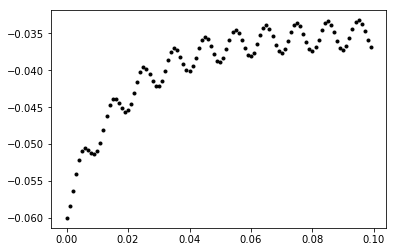

In [6]:
from scipy.integrate import odeint

t_max = 100e-3    # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
i_mean = 25e-3   # ampere

def I(t):
    return i_mean*(1+np.sin(2*np.pi*t/0.01))

def dvdt(v, t):
    return (1.0/tau)*(el - v + I(t))

t = np.arange(0, t_max, dt)
v = odeint(dvdt, [el], t)

plt.plot(t, v, '.k');